In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import glob
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.pylab import *
# repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
# style.use("results/style_sheet.mplstyle")
rc('figure', figsize=(11,5))
plt.rcParams.update({'axes.titlesize': 'large','lines.linewidth': 3})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


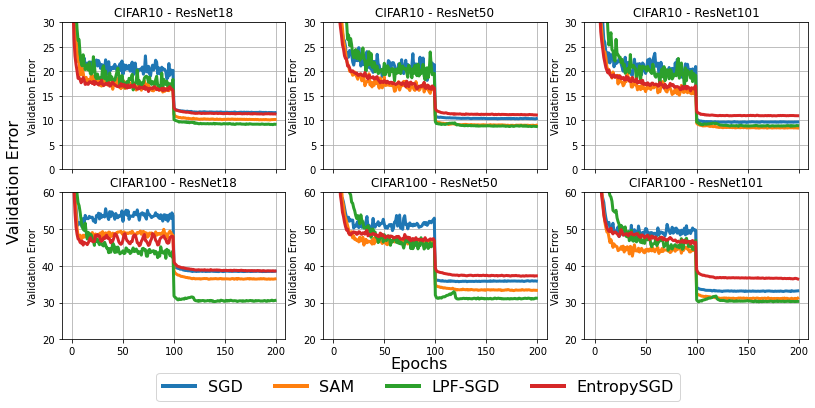

In [36]:
fig, ax  = plt.subplots(2,3,sharex=True)
ax = ax.ravel()
idx = 0
for dtype, dtype_label in zip(["cifar10", "cifar100"],["CIFAR10","CIFAR100"]):
    for mtype, mtype_label in zip(["resnet18", "resnet50", "resnet101"],["ResNet18","ResNet50","ResNet101"]):
        for opt,label in zip(["sgd", "sam_sgd", "fsgd", "entropy_sgd"], ["SGD", "SAM","LPF-SGD","EntropySGD"]):
            train_err = np.zeros((5, 200))
            val_err = np.zeros((5, 200))

            for seed in [0,1,2,3,4]:
                all_folders =  glob.glob(f'../checkpoints/{dtype}/{mtype}/{opt}/run_ms_{seed}/run0/*event*', recursive=True)
                if opt == "entropy_sgd":
                    all_folders =  glob.glob(f'../checkpoints/entropy_sgd/{dtype}/{mtype}/{opt}/run_ms_{seed}/run0/*event*', recursive=True)

                for file in all_folders:
                    for e in tf.compat.v1.train.summary_iterator(file):
                        for v in e.summary.value:
                            if "Val/Val_Err1" in v.tag:
                                val_err[seed, e.step] = v.simple_value
            
            val_err[val_err == 0] = np.nan
            col_mean = np.nanmean(val_err, axis=0)
            inds = np.where(np.isnan(val_err))
            val_err[inds] = np.take(col_mean, inds[1])

            ax[idx].plot(np.mean(val_err,0))
        
        ax[idx].grid()
        ax[idx].set_title(f"{dtype_label} - {mtype_label}")
        if dtype=='cifar10':
            ax[idx].set_ylim([0,30])
        else:
            ax[idx].set_ylim([20,60])
        ax[idx].set_ylabel("Validation Error")
        idx+=1

fig.text(0.5, -0.02, 'Epochs', ha='center', fontsize=16)
fig.text(-0.02, 0.5, 'Validation Error', va='center', rotation='vertical', fontsize=16)
plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=0.1)
leg = fig.legend(["SGD", "SAM", "LPF-SGD", "EntropySGD"], ncol=4, bbox_to_anchor=(0.84,-0.01), fontsize=16)
for legobj in leg.legendHandles:
    legobj.set_linewidth(4)

fig.savefig(f"nips/exp1.eps", bbox_inches='tight')

/Users/devansh20la/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/Users/devansh20la/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/Users/devansh20la/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/Users/devansh20la/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/Users/devansh20la/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


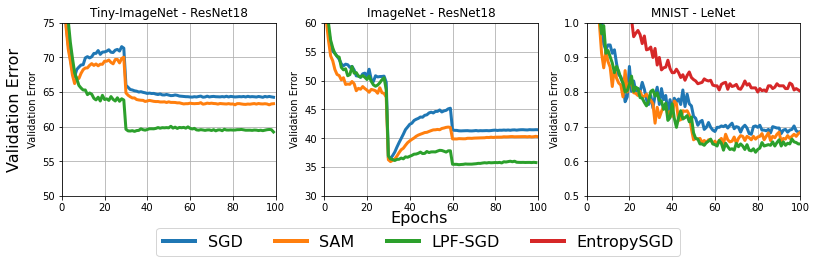

In [34]:
fig, ax  = plt.subplots(1,3,sharex=True, figsize=(11,3))
ax = ax.ravel()
idx = 0
for dtype, dtype_label in zip(["tinyimagenet", "imagenet"],["Tiny-ImageNet", "ImageNet"]):        
    for mtype, mtype_label in zip(["resnet18"],["ResNet18"]):
        for opt,label in zip(["sgd", "sam_sgd", "fsgd"], ["SGD", "SAM", "LPF-SGD"]):
            train_err = np.zeros((5, 120))
            val_err = np.zeros((5, 120))

            for seed in [0,1,2,3,4]:
                all_folders =  glob.glob(f'../checkpoints/{dtype}/{mtype}/{opt}/run_ms_{seed}/run0/*event*', recursive=True)
                for file in all_folders:
                    for e in tf.compat.v1.train.summary_iterator(file):
                        for v in e.summary.value:
                            if "Val/Val_Err1" in v.tag:
                                val_err[seed, e.step] = v.simple_value
            
            val_err[val_err == 0] = np.nan
            col_mean = np.nanmean(val_err, axis=0)
            inds = np.where(np.isnan(val_err))
            val_err[inds] = np.take(col_mean, inds[1])

            ax[idx].plot(np.mean(val_err,0))
        
        ax[idx].grid()
        ax[idx].set_title(f"{dtype_label} - {mtype_label}")
        ax[idx].set_ylabel("Validation Error")
        ax[idx].set_xlim([0,100])
        if dtype=='tinyimagenet':
            ax[idx].set_ylim([50,75])
        else:
            ax[idx].set_ylim([30,60])
        idx+=1

lines = []
for dtype, dtype_label in zip(["mnist"],["MNIST"]):        
    for mtype, mtype_label in zip(["lenet"],["LeNet"]):
        for opt,label in zip(["sgd", "sam_sgd", "fsgd", "entropy_sgd"], ["SGD", "SAM", "LPF-SGD","EntropySGD"]):
            train_err = np.zeros((5, 150))
            val_err = np.zeros((5, 150))

            for seed in [0,1,2,3,4]:
                all_folders =  glob.glob(f'../checkpoints/{dtype}/{mtype}/{opt}/run_ms_{seed}/*event*', recursive=True)
                for file in all_folders:
                    for e in tf.compat.v1.train.summary_iterator(file):
                        for v in e.summary.value:
                            if "Val/Val_Err1" in v.tag:
                                val_err[seed, e.step] = v.simple_value
            
#             val_err[val_err == 0] = np.nan
#             col_mean = np.nanmean(val_err, axis=0)
#             inds = np.where(np.isnan(val_err))
#             val_err[inds] = np.take(col_mean, inds[1])

            line, = ax[idx].plot(np.mean(val_err,0))
            lines.append(line)
        
        ax[idx].grid()
        ax[idx].set_title(f"{dtype_label} - {mtype_label}")
        ax[idx].set_ylabel("Validation Error")
        ax[idx].set_ylim([0.50,1])
        idx+=1
        
fig.text(0.5, -0.02, 'Epochs', ha='center', fontsize=16)
fig.text(-0.02, 0.5, 'Validation Error', va='center', rotation='vertical', fontsize=16)
plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=0.1)
leg = fig.legend(lines, ["SGD", "SAM", "LPF-SGD", "EntropySGD"], ncol=4, bbox_to_anchor=(0.84,-0.01), fontsize=16)
for legobj in leg.legendHandles:
    legobj.set_linewidth(4)

fig.savefig(f"nips/exp2.eps", bbox_inches='tight')

In [ ]:
for dtype in ['cifar10','cifar100']:
    for mtype in ['resnet18','resnet50','resnet101']:
        alldata = {}
        for opt in ["sgd", "sam_sgd", "fsgd"]:
            folders = sorted(glob.glob(f'../checkpoints/{dtype}/{mtype}/{opt}/*'), key=lambda y: y.split('run_ms_')[1])
            alldata[f'{opt}'] = {
                'trainloss': (np.zeros((200, len(folders))),np.zeros((200, len(folders)))),
                'trainerr': (np.zeros((200, len(folders))),np.zeros((200, len(folders)))),
                'valloss': (np.zeros((200, len(folders))),np.zeros((200, len(folders)))),
                'valerr': (np.zeros((200, len(folders))),np.zeros((200, len(folders))))
            }
            data = alldata[f'{opt}']

            for k, f in enumerate(folders):
                file = glob.glob(f'{f}/run0/*event*')[0]
                for e in tf.compat.v1.train.summary_iterator(file):
                    for v in e.summary.value:
                        if v.tag == "Train/Train_Loss":
                            data['trainloss'][e.step, k] = v.simple_value
                        if v.tag == "Val/Val_Loss":
                            data['valloss'][e.step, k] = v.simple_value
                        if v.tag == "Train/Train_Err" or v.tag == "Train/Train_Err1":
                            data['trainerr'][e.step, k] = v.simple_value
                        if v.tag == "Val/Val_Err" or v.tag == "Val/Val_Err1":
                            data['valerr'][e.step, k] = v.simple_value

            for k,v in data.items():
                if k != 'walltime':
                    data[k] = {}
                    data[k]['mean'] = v.mean(1)
                    data[k]['std'] = v.std(1)

        fig, ax = plt.subplots(figsize=(6,4))

        for i, opt in enumerate(['sgd', 'sam_sgd','fsgd']):
            x = alldata[f"{opt}"]["walltime"]
            m = alldata[f"{opt}"]["valerr"]['mean'][:-1]
            s = alldata[f"{opt}"]["valerr"]['std'][:-1]
            ax.plot(x, m)
            ax.fill_between(x, m+s, m-s, alpha=0.2)

        ax.set_xlabel("Wall time (s)")
        ax.set_ylabel("Validation Error")
        ax.grid()
        if dtype == 'cifar10':
            ax.set_ylim([0,30])
        else:
            ax.set_ylim([20,60])
        ax.set_title(f'{dtype} -- {mtype}'.upper())
        plt.legend(["SGD","SAM", "S-SGD"])
        plt.tight_layout()
        plt.savefig(f"{dtype}_{mtype}_val.png")

In [ ]:
for dtype in ['cifar10','cifar100']:
    for mtype in ['resnet18','resnet50','resnet101']:
        alldata = {}
        def get_single_iteration_time(opt):
            file = glob.glob(f"../checkpoints/{dtype}_walltime/{mtype}/{opt}/run_ms_0/run0/*event*")[0]
            wall_time = []
            for e in tf.compat.v1.train.summary_iterator(file):
                for v in e.summary.value:
                    if v.tag == "Train/Train_Loss":
                        wall_time.append(e.wall_time)
            wall_time = [x - wall_time[0] for x in wall_time]
            itr_time = [wall_time[i+1] - wall_time[i] for i in range(len(wall_time)-1)]
            return np.mean(itr_time)


        for opt in ["sgd", "sam_sgd", "fsgd"]:
            folders = sorted(glob.glob(f'../checkpoints/{dtype}/{mtype}/{opt}/*'), key=lambda y: y.split('run_ms_')[1])
            alldata[f'{opt}'] = {
                'trainloss': np.zeros((200, len(folders))),
                'trainerr': np.zeros((200, len(folders))),
                'valloss': np.zeros((200, len(folders))),
                'valerr': np.zeros((200, len(folders))),
                'walltime': np.arange((199)) * get_single_iteration_time(f'{opt}')
            }
            data = alldata[f'{opt}']

            for k, f in enumerate(folders):
                file = glob.glob(f'{f}/run0/*event*')[0]
                for e in tf.compat.v1.train.summary_iterator(file):
                    for v in e.summary.value:
                        if v.tag == "Train/Train_Loss":
                            data['trainloss'][e.step, k] = v.simple_value
                        if v.tag == "Val/Val_Loss":
                            data['valloss'][e.step, k] = v.simple_value
                        if v.tag == "Train/Train_Err" or v.tag == "Train/Train_Err1":
                            data['trainerr'][e.step, k] = v.simple_value
                        if v.tag == "Val/Val_Err" or v.tag == "Val/Val_Err1":
                            data['valerr'][e.step, k] = v.simple_value

            for k,v in data.items():
                if k != 'walltime':
                    data[k] = {}
                    data[k]['mean'] = v.mean(1)
                    data[k]['std'] = v.std(1)

        fig, ax = plt.subplots(figsize=(6,4))

        for i, opt in enumerate(['sgd', 'sam_sgd','fsgd']):
            x = alldata[f"{opt}"]["walltime"]
            m = alldata[f"{opt}"]["valerr"]['mean'][:-1]
            s = alldata[f"{opt}"]["valerr"]['std'][:-1]
            ax.plot(x, m)
            ax.fill_between(x, m+s, m-s, alpha=0.2)

        ax.set_xlabel("Wall time (s)")
        ax.set_ylabel("Validation Error")
        ax.grid()
        if dtype == 'cifar10':
            ax.set_ylim([0,30])
        else:
            ax.set_ylim([20,60])
        ax.set_title(f'{dtype} -- {mtype}'.upper())
        plt.legend(["SGD","SAM", "S-SGD"])
        plt.tight_layout()
        plt.savefig(f"{dtype}_{mtype}_val.png")

In [ ]:
for dtype in ['tinyimagenet']:
    for mtype in ['resnet18']:
        alldata = {}
        def get_single_iteration_time(opt):
            file = glob.glob(f"../checkpoints/{dtype}_walltime/{mtype}/{opt}/run_ms_0/run0/*event*")[0]
            wall_time = []
            for e in tf.compat.v1.train.summary_iterator(file):
                for v in e.summary.value:
                    if v.tag == "Train/Train_Loss":
                        wall_time.append(e.wall_time)
            wall_time = [x - wall_time[0] for x in wall_time]
            itr_time = [wall_time[i+1] - wall_time[i] for i in range(len(wall_time)-1)]
            return np.mean(itr_time)


        for opt in ["sgd", "sam_sgd", "fsgd"]:
            folders = sorted(glob.glob(f'../checkpoints/{dtype}/{mtype}/{opt}/*'), key=lambda y: y.split('run_ms_')[1])
            alldata[f'{opt}'] = {
                'trainloss': np.zeros((100, len(folders))),
                'trainerr': np.zeros((100, len(folders))),
                'valloss': np.zeros((100, len(folders))),
                'valerr': np.zeros((100, len(folders))),
                'walltime': np.arange((99)) * get_single_iteration_time(f'{opt}')
            }
            data = alldata[f'{opt}']

            for k, f in enumerate(folders):
                file = glob.glob(f'{f}/run0/*event*')[0]
                for e in tf.compat.v1.train.summary_iterator(file):
                    for v in e.summary.value:
                        if v.tag == "Train/Train_Loss":
                            data['trainloss'][e.step, k] = v.simple_value
                        if v.tag == "Val/Val_Loss":
                            data['valloss'][e.step, k] = v.simple_value
                        if v.tag == "Train/Train_Err" or v.tag == "Train/Train_Err1":
                            data['trainerr'][e.step, k] = v.simple_value
                        if v.tag == "Val/Val_Err" or v.tag == "Val/Val_Err1":
                            data['valerr'][e.step, k] = v.simple_value

            for k,v in data.items():
                if k != 'walltime':
                    data[k] = {}
                    data[k]['mean'] = v.mean(1)
                    data[k]['std'] = v.std(1)

        fig, ax = plt.subplots(figsize=(6,4))

        for i, opt in enumerate(['sgd', 'sam_sgd','fsgd']):
            x = alldata[f"{opt}"]["walltime"]
            m = alldata[f"{opt}"]["valerr"]['mean'][:-1]
            s = alldata[f"{opt}"]["valerr"]['std'][:-1]
            ax.plot(x, m)
            ax.fill_between(x, m+s, m-s, alpha=0.2)

        ax.set_xlabel("Wall time (s)")
        ax.set_ylabel("Validation Error")
        ax.grid()
        ax.set_title(f'{dtype} -- {mtype}'.upper())
        plt.legend(["SGD","SAM", "S-SGD"])
        plt.tight_layout()
        plt.savefig(f"{dtype}_{mtype}_val.png")

In [ ]:
def get_single_iteration_time(opt):
    file = glob.glob(f"../checkpoints/mnist_walltime/lenet/{opt}/run_ms_0/run0/*event*")[0]
    wall_time = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == "Train/Train_Loss":
                wall_time.append(e.wall_time)
    wall_time = [x - wall_time[0] for x in wall_time]
    itr_time = [wall_time[i+1] - wall_time[i] for i in range(len(wall_time)-1)]
    return np.mean(itr_time)

alldata = {}
dtype = 'mnist'
mtype = 'lenet'

for opt in ['sgd', 'sam_sgd', 'fsgd']:
    folders = sorted(glob.glob(f'../checkpoints/{dtype}/{mtype}/{opt}/*'), key=lambda y: y.split('run_ms_')[1])
    alldata[f'{opt}'] = {
        'trainloss': np.zeros((150, len(folders))),
        'trainerr': np.zeros((150, len(folders))),
        'valloss': np.zeros((150, len(folders))),
        'valerr': np.zeros((150, len(folders))),
        'walltime': np.arange((150)) * get_single_iteration_time(f'{opt}')
    }
    data = alldata[f'{opt}']

    for k, f in enumerate(folders):
        file = glob.glob(f'{f}/*event*')[0]
        for e in tf.compat.v1.train.summary_iterator(file):
            for v in e.summary.value:
                if v.tag == "Train/Train_Loss":
                    data['trainloss'][e.step, k] = v.simple_value
                if v.tag == "Val/Val_Loss":
                    data['valloss'][e.step, k] = v.simple_value
                if v.tag == "Train/Train_Err" or v.tag == "Train/Train_Err1":
                    data['trainerr'][e.step, k] = v.simple_value
                if v.tag == "Val/Val_Err" or v.tag == "Val/Val_Err1":
                    data['valerr'][e.step, k] = v.simple_value

    for k,v in data.items():
        if k != 'walltime':
            data[k] = {}
            data[k]['mean'] = v.mean(1)
            data[k]['std'] = v.std(1)

fig, axs = plt.subplots(figsize=(6,4))

for i, opt in enumerate(['sgd', 'sam_sgd', 'fsgd']):
    x = alldata[f"{opt}"]["walltime"][:-1]
    m = alldata[f"{opt}"]["valerr"]['mean'][:-1]
    s = alldata[f"{opt}"]["valerr"]['std'][:-1]
    axs.plot(x, m)
    axs.fill_between(x, m+s, m-s, alpha=0.1)

axs.set_ylim([0.5,0.9])
axs.set_xlabel("Wall time (s)")
axs.set_ylabel("Validation Error")
axs.set_title(f'{dtype} -- {mtype}'.upper())
axs.grid()
plt.legend(["SGD","SAM", "S-SGD"])
plt.tight_layout()
plt.savefig(f"{dtype}_{mtype}_val.png")

In [ ]:
def get_single_iteration_time(opt):
    itr_count = {'sgd':0.3921496839523315 , 'sam_sgd':0.7734825398921966, 'fsgd':0.41049253153800963 }
    return 60*60

alldata = {}
dtype = 'imagenet'
mtype = 'resnet18'

for opt in ['sgd', 'sam_sgd', 'fsgd']:
    folders = sorted(glob.glob(f'../checkpoints/{dtype}/{mtype}/{opt}/*'), key=lambda y: y.split('run_ms_')[1])
    alldata[f'{opt}'] = {
        'trainloss': np.zeros((100, len(folders))),
        'trainerr': np.zeros((100, len(folders))),
        'trainerr': np.zeros((100, len(folders))),
        'valloss': np.zeros((100, len(folders))),
        'valerr': np.zeros((100, len(folders))),
        'walltime': np.arange((100))*get_single_iteration_time(opt)
    }
    data = alldata[f'{opt}']

    for k, f in enumerate(folders):
        file = glob.glob(f'{f}/run0/*event*')[0]
        for e in tf.compat.v1.train.summary_iterator(file):
            if e.step >= 100:
                continue
            for v in e.summary.value:
                if v.tag == "Train/Train_Loss":
                    data['trainloss'][e.step, k] = v.simple_value
                if v.tag == "Val/Val_Loss":
                    data['valloss'][e.step, k] = v.simple_value
                if v.tag == "Train/Train_Err" or v.tag == "Train/Train_Err1":
                    data['trainerr'][e.step, k] = v.simple_value
                if v.tag == "Val/Val_Err" or v.tag == "Val/Val_Err1":
                    data['valerr'][e.step, k] = v.simple_value

    for k,v in data.items():
        if k != 'walltime':
            data[k] = {}
            data[k]['mean'] = v.mean(1)
            data[k]['std'] = v.std(1)

fig, axs = plt.subplots(figsize=(6,4))

for i, opt in enumerate(['sgd', 'sam_sgd', 'fsgd']):
    x = alldata[f"{opt}"]["walltime"][:-1]
    m = alldata[f"{opt}"]["valerr"]['mean'][:-1]
    s = alldata[f"{opt}"]["valerr"]['std'][:-1]
    axs.plot(x, m)
    axs.fill_between(x, m+s, m-s, alpha=0.1)

# axs.set_xlim([0,99*])
# axs.set_ylim([20,100])

axs.set_xlabel("Wall time (s)")
axs.set_ylabel("Validation Error")
axs.grid()
axs.set_title(f'{dtype} -- {mtype}'.upper())
plt.legend(["SGD","SAM", "S-SGD"])
plt.tight_layout()
plt.savefig(f"{dtype}_{mtype}_val.png")